# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [4]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [5]:
X = torch.randn(4, 3)
Y = torch.randn(4, 3)

# 행으로 병합 코드
row_concat = torch.cat((X, Y), dim=0)

# 열로 병합 코드
col_concat = torch.cat((X, Y), dim=1)

print("X:")
print(X)
print("Y:")
print(Y)
print("row_concat:")
print(row_concat)
print("col_concat:")
print(col_concat)

X:
tensor([[ 1.8118, -1.0951,  1.6388],
        [-0.1375, -1.0463,  1.0613],
        [ 0.8213, -0.3896, -0.4339],
        [ 0.0130,  0.2664, -0.6346]])
Y:
tensor([[ 0.1895, -0.3606, -1.1996],
        [ 0.1719, -0.2363,  1.2500],
        [ 1.4899, -2.1979,  0.4530],
        [-0.9699,  0.5333,  0.7137]])
row_concat:
tensor([[ 1.8118, -1.0951,  1.6388],
        [-0.1375, -1.0463,  1.0613],
        [ 0.8213, -0.3896, -0.4339],
        [ 0.0130,  0.2664, -0.6346],
        [ 0.1895, -0.3606, -1.1996],
        [ 0.1719, -0.2363,  1.2500],
        [ 1.4899, -2.1979,  0.4530],
        [-0.9699,  0.5333,  0.7137]])
col_concat:
tensor([[ 1.8118, -1.0951,  1.6388,  0.1895, -0.3606, -1.1996],
        [-0.1375, -1.0463,  1.0613,  0.1719, -0.2363,  1.2500],
        [ 0.8213, -0.3896, -0.4339,  1.4899, -2.1979,  0.4530],
        [ 0.0130,  0.2664, -0.6346, -0.9699,  0.5333,  0.7137]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [6]:
!pip install d2l 

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/111.7 kB ? eta -:--:--
   ---------------------- ----------------- 61.4/111.7 kB ? eta -:--:--
   ---------------------------------------- 111.7/111.7 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
    --------------------------------------- 0.1/7.5 MB 7.0 MB/s eta 0:00:02
    --------------------------------------- 0.2/7.5 MB 3.7 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.5 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.5 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.5 MB 4.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/7.5 MB 5.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.5 MB 5.8 MB/s eta 0:00:01
   ------------ -------

In [9]:
!pip install torchvision


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------- -------------------------- 0.4/1.2 MB 8.3 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 11.9 MB/s eta 0:00:01
   ------------------------------------- -- 1.1/1.2 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/159.8 MB 12.2 MB/s eta 0:00:14
   ---------------------------------------- 1.0/159.8 MB 11.9 MB/s eta 0:00:14
   ---------------------------------------- 1.5/159.8 MB 11.8 MB/s eta 0:00:14
    --------------------------------------- 2.0/159.8 MB 11.7 MB/s eta 0:00:14
    --------------------------------------- 2.5/159.8 MB 11.6 MB/s eta 0:00:14
    --------------------------------------- 3.1/159.8 MB 11.7 MB/s eta 0:00:14
    --------------------------------------- 3.6/159.8 MB 11.6 MB/s eta 0:00:14
  

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [8]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.7748, -0.8797]) 
label: tensor([1.4905])


In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):

        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0834,  0.4393],
        [ 0.4126,  0.5419],
        [-1.8795, -0.8384],
        [-0.1636, -2.2594],
        [ 0.5801, -0.8516],
        [-0.0238,  1.7567],
        [-0.6388, -0.9496],
        [ 0.8713, -1.7059],
        [ 1.2342, -1.0912],
        [ 2.3261, -1.5265],
        [-0.3462,  0.4757],
        [ 0.6592,  0.2646],
        [-0.4924, -0.0327],
        [ 0.5681, -0.9878],
        [-1.9065, -1.8145],
        [-0.5027, -0.4817],
        [ 1.0103,  1.4266],
        [-0.4884,  0.9520],
        [ 0.1728,  0.5975],
        [ 0.1074,  0.2642]]) 
 tensor([[ 4.5870],
        [ 5.9196],
        [ 1.1189],
        [ 8.3882],
        [ 8.5094],
        [ 2.8014],
        [ 5.0052],
        [10.6864],
        [10.8664],
        [14.7785],
        [ 3.7159],
        [ 7.0746],
        [ 4.0828],
        [ 8.7005],
        [ 2.5032],
        [ 4.7338],
        [ 6.3759],
        [ 2.6182],
        [ 5.1245],
        [ 5.4086]])


In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([0])#원하는 실수를 넣어주세요

In [13]:
def linreg(X, w, b):
    """The linear regression model."""
    ###lr func 코드 완성하기
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    """Squared loss."""
    ###loss function 직접 짜보기
    loss = (y_hat - y.reshape(y_hat.shape))**2
    mean_loss = loss.mean()
    return mean_loss

In [15]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
            if param.grad is not None:
                param -= lr * param.grad / batch_size
                param.grad.zero_()
        

In [21]:
lr = 0.001 ###직접 설정
num_epochs = 100 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss###위에서 가져오기

w_data = []
loss_data = []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)###채워넣기), ###채워넣기)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)###채워넣기)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        w_data.append(w.clone().detach().numpy())
        loss_data.append(train_l.item())
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 30.224915
epoch 2, loss 30.224735
epoch 3, loss 30.224556
epoch 4, loss 30.224386
epoch 5, loss 30.224213
epoch 6, loss 30.224047
epoch 7, loss 30.223888
epoch 8, loss 30.223726
epoch 9, loss 30.223570
epoch 10, loss 30.223415
epoch 11, loss 30.223265
epoch 12, loss 30.223124
epoch 13, loss 30.222977
epoch 14, loss 30.222836
epoch 15, loss 30.222698
epoch 16, loss 30.222565
epoch 17, loss 30.222429
epoch 18, loss 30.222300
epoch 19, loss 30.222172
epoch 20, loss 30.222044
epoch 21, loss 30.221926
epoch 22, loss 30.221806
epoch 23, loss 30.221687
epoch 24, loss 30.221573
epoch 25, loss 30.221460
epoch 26, loss 30.221350
epoch 27, loss 30.221241
epoch 28, loss 30.221136
epoch 29, loss 30.221029
epoch 30, loss 30.220930
epoch 31, loss 30.220829
epoch 32, loss 30.220730
epoch 33, loss 30.220636
epoch 34, loss 30.220539
epoch 35, loss 30.220449
epoch 36, loss 30.220360
epoch 37, loss 30.220270
epoch 38, loss 30.220188
epoch 39, loss 30.220098
epoch 40, loss 30.220018
epoch 41,

In [23]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([0.1288, 0.1316], grad_fn=<SubBackward0>)
error in estimating b: tensor([5.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

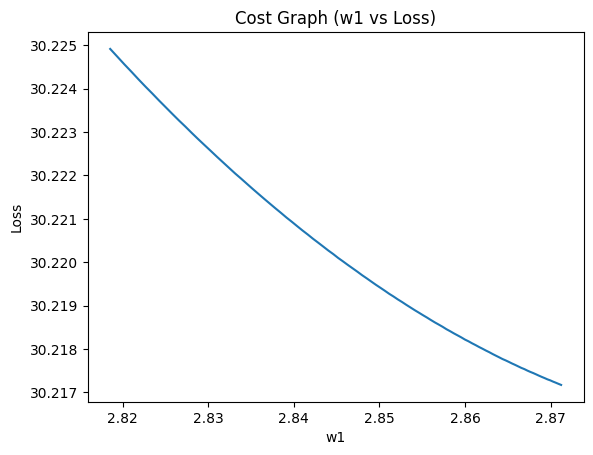

In [30]:
import matplotlib.pyplot as plt

w_value1 = [w[0][0] for w in w_data] 
plt.plot(w_value1, loss_data)
plt.xlabel('w1')
plt.ylabel('Loss')
plt.title('Cost Graph (w1 vs Loss)')
plt.show()

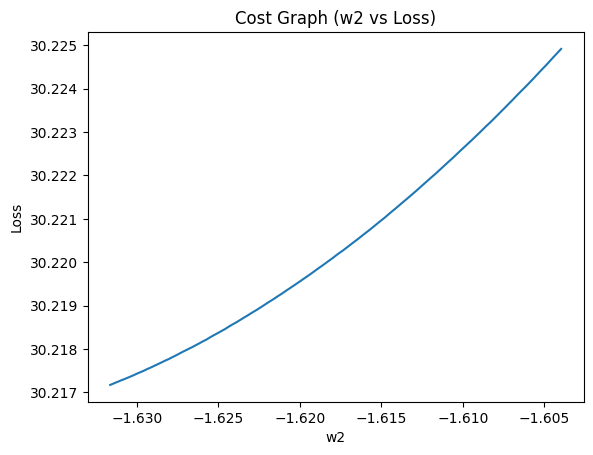

In [33]:
w_value2 = [w[1] for w in w_data] 
plt.plot(w_value2, loss_data)
plt.xlabel('w2')
plt.ylabel('Loss')
plt.title('Cost Graph (w2 vs Loss)')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [27]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [28]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [29]:
next(iter(data_iter))

[tensor([[-1.1284e+00,  6.6699e-02],
         [-3.7649e-01, -3.1845e+00],
         [-7.3760e-02, -1.5192e+00],
         [ 1.7081e+00, -1.1751e+00],
         [ 6.8829e-01, -6.2517e-01],
         [-4.2791e-01, -4.9561e-01],
         [ 8.5804e-01, -8.9147e-01],
         [ 3.6265e-01,  2.4067e+00],
         [ 2.2059e-02, -3.4126e-01],
         [-3.3309e-01, -4.6510e-01],
         [-4.3003e-01,  2.5901e-01],
         [-1.0263e-01,  8.2513e-02],
         [-8.1323e-01,  1.3205e-01],
         [ 7.3821e-01,  2.6792e-01],
         [-6.3656e-01, -1.8708e-03],
         [ 3.1760e-01, -2.9253e-01],
         [ 2.1053e+00,  1.0582e+00],
         [ 2.9195e+00,  1.5573e+00],
         [ 1.0358e+00,  1.7715e+00],
         [ 7.2739e-01,  8.9151e-01]]),
 tensor([[ 2.0095],
         [ 9.1482],
         [ 7.5483],
         [12.3941],
         [ 8.5116],
         [ 4.9603],
         [ 9.4044],
         [ 2.9789],
         [ 6.0953],
         [ 5.1861],
         [ 3.8237],
         [ 5.0561],
         [ 2.8607]

In [59]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))###채워넣기)

In [60]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [49]:
###api function으로 직접 설정
loss = nn.MSELoss()

In [61]:
###api function으로 직접 설정
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [62]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)###직접설정)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.706166
epoch 2, loss 0.011965
epoch 3, loss 0.000299


In [63]:
w = net[0].weight.data      ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data        ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0068, -0.0035])
error in estimating b: tensor([0.0117])
